In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests



personal_data=requests.get('https://api.bjs.ojp.gov/bjs/ncvs/v2/personal/2018?format=json').json()
household_data=requests.get('https://api.bjs.ojp.gov/bjs/ncvs/v2/household/2018?format=json').json()


In [2]:
url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/personal/"

year_list = ["2014", "2015", "2016", "2017", "2018"]

# Set empty lists to hold personal data
weight = []
ager = []
gender = []
hincome = []
newcrime = []
locationr = []
years = []
region=[]
notify=[]

# Loop through each year
for year in year_list:

    # Create search query, make a request and store in JSON file
    query = url + year + "?format=json" 
    response = requests.get(query)
    response_json = response.json()
    
    data_list = response_json["personalData"]
  
    for data in data_list:
        
        try: 
            region.append(data['region'])
            years.append(data['year'])
            weight.append(data['weight'])
            ager.append(data['ager'])
            notify.append(data['notify'])
            gender.append(data['gender'])
            hincome.append(data['hincome'])
            newcrime.append(data['newoff'])
            locationr.append(data['locationr'])
        except Exception:
            print(data)

In [3]:
#Create a dataframe
ncvs = pd.DataFrame({
    "region":region,
    "file report":notify,
    "year": years,
    "weight": weight,
    "ager": ager,
    "gender": gender,
    "hincome": hincome,
    "newcrime":newcrime,
    "locationr": locationr})

ncvs.head()


,region,file report,year,weight,ager,gender,hincome,newcrime,locationr
0,3,1,2014,2877.2646,5,2,4,1,2
1,3,2,2014,4079.9336,4,1,88,3,3
2,3,1,2014,5984.119,4,2,88,3,2
3,3,2,2014,3271.8376,6,1,4,3,5
4,3,1,2014,3402.2559,6,1,88,4,1


In [4]:
#Replacing column numerical values into readdable data as pe rhte values assigned in the Personal Crime  API

ncvs['ager'] = ncvs['ager'].replace({"1":"12-14",
        "2":"15-17",
        "3": "18-20",
        "4": "21-24",                         
        "5": "25-34",
        "6": "35-49",
        "7": "50-64",                         
        "8": "65+"})

ncvs['gender'] = ncvs['gender'].replace({"1":"Male",
        "2":"Female"})


ncvs['region'] = ncvs['region'].replace({"1":"NorthEast",
        "2": "MidWest",
        "3": "South",
        "4": "West"})

ncvs['file report'] = ncvs['file report'].replace({"1":"Yes",
        "2": "No",
        "3": "Do not know"})



ncvs['hincome'] = ncvs['hincome'].replace({"1":"<7.5k",
        "2": "7.5k-14.9k",
        "3": "15k-24.9k",
        "4": "25k-34.9k",
        "5": "35k-49.9k",
        "6": "50k-74.9k",
        "7": "75k+",
        "88": "Unknown"})

ncvs['locationr'] = ncvs['locationr'].replace({"1":"victim's home",
        "2": " friend/neighbor/relative's home",
        "3": "com/parking lot or public",
        "4": "school",
        "5": "other location"})

ncvs['newcrime'] = ncvs['newcrime'].replace({"1":"Rape/sexual assault",
        "2": "Robbery",
        "3": "Aggravated assault",
        "4": "Simple assault",
        "5": "Personal theft"})

ncvs = ncvs.rename(columns = {'ager': 'age', 'hincome': 'income', 
                     'newcrime': 'crime type', 'locationr': 'location'})

ncvs.head()


,region,file report,year,weight,age,gender,income,crime type,location
0,South,Yes,2014,2877.2646,25-34,Female,25k-34.9k,Rape/sexual assault,friend/neighbor/relative's home
1,South,No,2014,4079.9336,21-24,Male,Unknown,Aggravated assault,com/parking lot or public
2,South,Yes,2014,5984.119,21-24,Female,Unknown,Aggravated assault,friend/neighbor/relative's home
3,South,No,2014,3271.8376,35-49,Male,25k-34.9k,Aggravated assault,other location
4,South,Yes,2014,3402.2559,35-49,Male,Unknown,Simple assault,victim's home


In [5]:
#Set url for Household Crimes  API
url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/household/"

# Set empty lists to hold data
weight_h =[]
ager_h = []
gender_h = []
hincome_h = []
newcrime_h = []
locationr_h = []
years_h = []
region_h=[]
notify_h=[]


# Loop through each year
for year in year_list:

    # Create search query, make a request and store in JSON file
    query = url + year + "?format=json"
    response = requests.get(query)
    response_json = response.json()
    
    data_list=response_json["householdData"]
  
    for data in data_list:
        
        try: 
            region_h.append(data['region'])
            years_h.append(data['year'])
            weight_h.append(data['weight'])
            ager_h.append(data['hhage'])
            notify_h.append(data['notify'])
            gender_h.append(data['hhgen'])
            hincome_h.append(data['hincome'])
            newcrime_h.append(data['newoff'])
            locationr_h.append(data['locationr'])
        except Exception:
           print(data)

In [6]:
#Creating Dataframesfor household data
ncvs_h = pd.DataFrame({
    "region_h":region_h,
    "notify_h":notify_h,
    "year_h": years_h,
    "weight_h": weight_h,
    "age_h": ager_h,
    "gender_h": gender_h,
    "hincome_h": hincome_h,
    "newcrime_h": newcrime_h,
    "locationr_h": locationr_h})

ncvs_h.head()


,region_h,notify_h,year_h,weight_h,age_h,gender_h,hincome_h,newcrime_h,locationr_h
0,2,1,2014,1895.1135,2,2,7,6,1
1,3,2,2014,1610.5946,4,2,4,8,1
2,3,1,2014,1674.6003,3,2,2,8,3
3,2,2,2014,1231.1396,4,2,2,6,1
4,2,2,2014,1456.5726,3,1,4,6,1


In [7]:
#Replacing column numerical values into readdable data as pe rhte values assigned in the Household Crime  API

ncvs_h['age_h'] = ncvs_h['age_h'].replace({"1":"<19",
        "2":"20-34",
        "3": "35-49",
        "4": "50-64",
        "5": "65+"})

ncvs_h['gender_h'] = ncvs_h['gender_h'].replace({"1":"Male",
        "2":"Female"})


ncvs_h['region_h'] = ncvs_h['region_h'].replace({"1":"Northeast",
        "2": "Midwest",
        "3": "South",
        "4": "West"})

ncvs_h['notify_h'] = ncvs_h['notify_h'].replace({"1":"Yes",
        "2": "No",
        "3": "Do not know"})


ncvs_h['hincome_h'] = ncvs_h['hincome_h'].replace({"1":"<7.5k",
        "2": "7.5k-14.9k",
        "3": "15k-24.9k",
        "4": "25k-34.9k",
        "5": "35k-49.9k",
        "6": "50k-74.9k",
        "7": "75k+",
        "88": "Unknown"})

ncvs_h['locationr_h'] = ncvs_h['locationr_h'].replace({"1":"victim's home",
        "2": " friend/neighbor/relative's home",
        "3": "com/parking lot or public",
        "4": "school",
        "5": "other location"})

ncvs_h['newcrime_h'] = ncvs_h['newcrime_h'].replace({"8":"Theft",
        "7": "Motor-vehicle theft",
        "6": "Burglary/trespassing"})

ncvs_h = ncvs_h.rename(columns = {'region_h': 'region', 'notify_h': 'file report',
                       'year_h': 'year', 'weight_h': 'weight',
                       'age_h': 'age', 'gender_h': 'gender',
                       'hincome_h': 'income', 'newcrime_h':'crime type',
                       'locationr_h': 'location'})

ncvs_h.head()

,region,file report,year,weight,age,gender,income,crime type,location
0,Midwest,Yes,2014,1895.1135,20-34,Female,75k+,Burglary/trespassing,victim's home
1,South,No,2014,1610.5946,50-64,Female,25k-34.9k,Theft,victim's home
2,South,Yes,2014,1674.6003,35-49,Female,7.5k-14.9k,Theft,com/parking lot or public
3,Midwest,No,2014,1231.1396,50-64,Female,7.5k-14.9k,Burglary/trespassing,victim's home
4,Midwest,No,2014,1456.5726,35-49,Male,25k-34.9k,Burglary/trespassing,victim's home


In [ ]:

combined_crime=pd.merge(ncvs, ncvs_h, on='region')
combined_crime.head()
#combinedcrime_renamed=combined_crime.rename(columns={'file report_x':'PC file report',
                                       #'year_x': 'PC year','weight_x':'PC weight', 'age_x': 'PC age',
                                       #'gender_x':'PC gender', 'income_x':'PC income','crime type_x': 'PC crime type',
                                       #'location_x': 'PC location', 'file report_y':'HC file report', 'year_y':'HC year',
                                       #'age_y': 'HC age','gender_y':'HC gender','income_y':'HC income', 'crime type_y':'HC crime type', 
                                       #'location_y':'HC location'})
#combinedcrime_renamed.head()



In [ ]:
recorded=ncvs_h.groupby(['crime type'])['file report'].apply(lambda x: x[x.str.contains("Yes")].count())
not_recorded=ncvs_h.groupby(['crime type'])['file report'].apply(lambda x: x[x.str.contains("No")].count())
unknown=ncvs_h.groupby(['crime type'])['file report'].apply(lambda x: x[x.str.contains("Do not know")].count())
strange=ncvs_h.groupby(['crime type'])['file report'].apply(lambda x: x[x.str.contains("8")].count())

In [ ]:
#Analysing the number of crimes that were reported in household crimes dataset
colors=["royalblue", "lightsteelblue", "cornflowerblue"]
ncvs_h.groupby(['region', 'file report']).size().unstack().plot(kind='bar', color=colors ,stacked=True)
plt.show()

NameError: name 'pd' is not defined

In [4]:
#getting the count of file rpeorts
Reported=ncvsh_filtered[ncvsh_filtered['file report'].str.contains("Yes")].count()
Not_Reported=ncvsh_filtered[ncvsh_filtered['file report'].str.contains("No")].count()
Unknown=ncvsh_filtered[ncvsh_filtered['file report'].str.contains("Do not know")].count()
Strange=ncvsh_filtered[ncvsh_filtered['file report'].str.contains("8")].count()

#file_reports=[Reported, Not_Reported, total_unknown]
#file_reports



NameError: name 'ncvsh_filtered' is not defined

In [78]:
#Approach 2 : for the bar graphs

#drop the data sets with errors
recorded=ncvs_h.groupby(['crime type'])['file report'].apply(lambda x: x[x.str.contains("Yes")].count())
not_recorded=ncvs_h.groupby(['crime type'])['file report'].apply(lambda x: x[x.str.contains("No")].count())
unknown=ncvs_h.groupby(['crime type'])['file report'].apply(lambda x: x[x.str.contains("Do not know")].count())
#strange=ncvs_h.groupby(['crime type'])['file report'].apply(lambda x: x[x.str.contains("8")].count())
unknown
#crime_type=ncvs_h.groupby('crime type').nunique()


crime type
Burglary/trespassing     76
Motor-vehicle theft       7
Theft                   258
Name: file report, dtype: int64

In [53]:
#approach 2 continued : plotting hte graph
data =([recorded, not_recorded, unknown])
crimes =["Burglary/Trespass", "MotorVehicle Theft", "Theft"]
rows=zip(data[0], data[1], data[2])
df=pd.DataFrame(rows, columns=crimes)
df.head()



,Burglary/Trespass,MotorVehicle Theft,Theft
0,3506,3509,76
1,1046,309,7
2,7972,19557,258


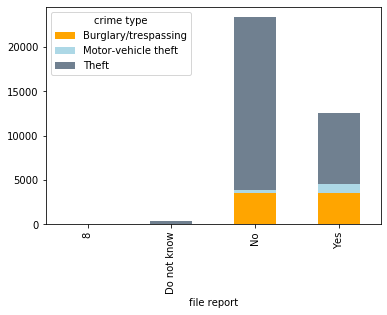

In [11]:
#Approach 3:
colors=["orange", "lightblue", "slategray"]
ncvs_h.groupby(['file report', 'crime type']).size().unstack().plot(kind='bar', color=colors ,stacked=True)
plt.show()

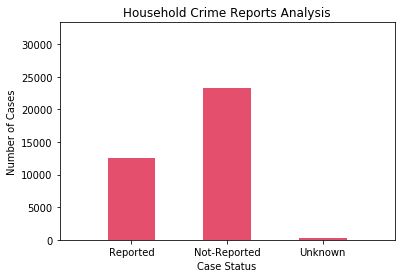

In [51]:
#plotting the bar chart
cases=[12524,23375 ,341]
x_axis=x_axis=np.arange(len(cases))
tick_locations=x_axis.copy()
plt.bar(x_axis, cases, color ='crimson', alpha=0.75, align='center', width=0.5 )
plt.xticks(tick_locations, ["Reported", "Not-Reported", "Unknown"])
plt.title('Household Crime Reports Analysis')
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(cases)+10000)
plt.show()

In [116]:
#Analysing the number of crimes that were reported in personal crimes dataset
ncvsp_filtered=ncvs.drop(['year', 'weight', 'age', 'gender', 'income', 'crime type', 'location'], axis=1)



In [117]:
#getting the count of file rpeorts
Reported=ncvsp_filtered[ncvsp_filtered['file report'].str.contains("Yes")].count()
Not_Reported=ncvsp_filtered[ncvsp_filtered['file report'].str.contains("No")].count()
Unknown=ncvsp_filtered[ncvsp_filtered['file report'].str.contains("Do not know")].count()
file_reports=[Reported, Not_Reported, Unknown]
file_reports

[region         4324
 file report    4324
 dtype: int64,
 region         4941
 file report    4941
 dtype: int64,
 region         132
 file report    132
 dtype: int64]

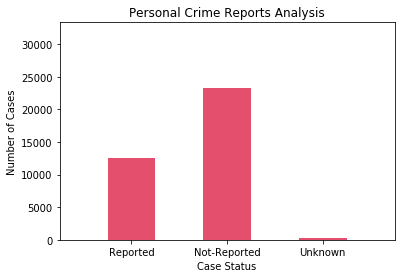

In [118]:
#plotting the bar chart for personal crimes
cases_p=[12524,23375 ,341]
x_axis=x_axis=np.arange(len(cases_p))
tick_locations=x_axis.copy()
plt.bar(x_axis, cases_p, color ='crimson', alpha=0.75, align='center', width=0.5 )
plt.xticks(tick_locations, ["Reported", "Not-Reported", "Unknown"])
plt.title('Personal Crime Reports Analysis')
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(cases_p)+10000)
plt.show()